# Exploring the pydataset 'Breakage Angle of Chocolate Cake'

This notebook investigates the contents of the 'cake' dataset provided in the `pydataset` package.

### The Data

In an experiment on the preparation of chocolate cakes, conducted at Iowa State College, 3 recipes for preparing the batter were compared (Cochran and Cox, 1957). Recipes I and II differed in that the chocolate was added at 40C and 60C, respectively, while recipe III contained extra sugar. In addition, 6 different baking temperatures were tested: these ranged in 10C steps from 175C to 225C. For each mix, enough batter was prepared for 6 cakes, each of which was baked at a different temperature. Thus the recipes are the whole-unit treatments, while the baking temperatures are the sub-unit treatments. There were 15 replications, and it will be assumed that these were conducted serially according to a randomized blocks scheme: that is, one replication was completed before starting the next, so that differences among replicates represent time differences. A number of measurements were made on the cakes. The measurement presented here is the breaking angle. One half of a slab of cake is held fixed, while the other half is pivoted about the middle until breakage occurs. The angle through which the moving half has revolved is read on a circular scale. Since breakage is gradual, the reading tends to have a subjective element.

### The Problem

The goal is to investigate the correlations between breakage angle and the various recipe and temperature combinations.  TODO is to analyze whether the differences are statistically significant, particularly given the somewhat subjective nature of the measurements.

### The Analysis

Let's get started by loading the dataset and viewing the first five rows.

In [12]:
from pydataset import data

# Load the data
df = data('cake')
# data('cake', show_doc=True)

# Display the first 5 rows
display(df.head())
# display(df.info())
# display(df.describe())

,replicate,recipe,temperature,angle,temp
1,1,A,175,42,175
2,1,A,185,46,185
3,1,A,195,47,195
4,1,A,205,39,205
5,1,A,215,53,215


Now we can calculate the average breakage angles for each recipe, for each temperature, and for all combinations of recipe and temperature.

In [3]:
df.recipe.astype('category')
df.groupby('recipe')['angle'].mean()

recipe
A    33.122222
B    31.644444
C    31.600000
Name: angle, dtype: float64

We can see that the breakage angle for recipes B and C are nearly identical, while the angle for recipe A is approximately 1.5 degrees greater.

In [ ]:
df.groupby('temperature')['angle'].mean()

temperature
175    27.977778
185    29.955556
195    31.422222
205    32.177778
215    35.844444
225    35.355556
Name: angle, dtype: float64

The higher temperatures resulted in larger breakage angles, with 215&deg;C being the greatest and 175&deg;C being the smallest.

In [ ]:
# Group by temperature then recipe
df.groupby(['temperature', 'recipe'])['angle'].mean()

# Grouping by recipe then temperature was harder to read for me, but it's here if you want it
# df.groupby(['recipe', 'temperature'])['angle'].mean()

temperature  recipe
175          A         29.133333
             B         26.866667
             C         27.933333
185          A         31.533333
             B         29.400000
             C         28.933333
195          A         30.800000
             B         31.733333
             C         31.733333
205          A         33.533333
             B         32.133333
             C         30.866667
215          A         38.666667
             B         34.466667
             C         34.400000
225          A         35.066667
             B         35.266667
             C         35.733333
Name: angle, dtype: float64

Unsurprisingly, the combination of recipe A and 215&deg;C shows the greatest breakage angle out of all the combinations.  However, all of the other temperature ranges appear to show more consistency across the three recipes.

Next, let's visualize the breakage angles across the replicates, first by temperature, then by recipe.

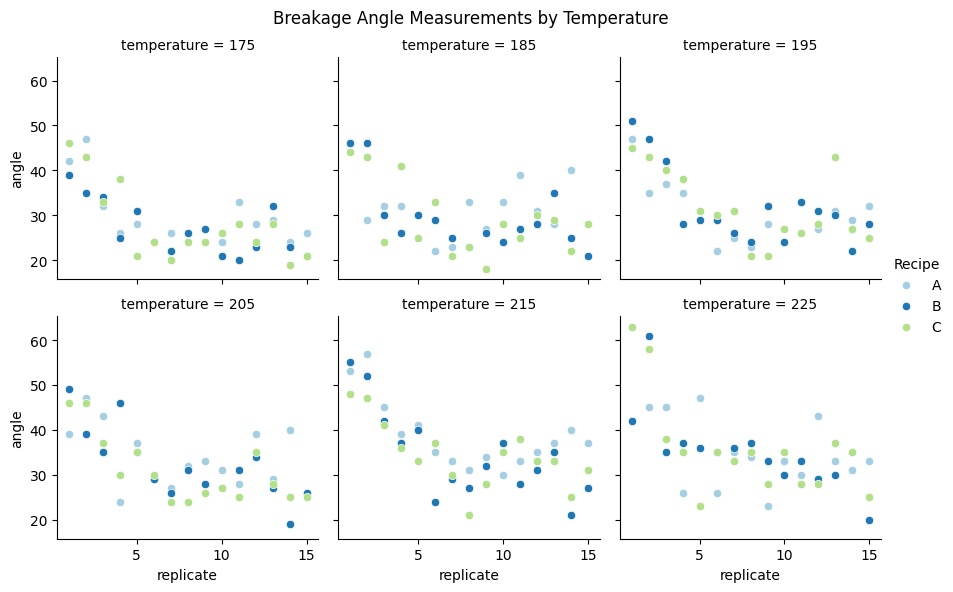

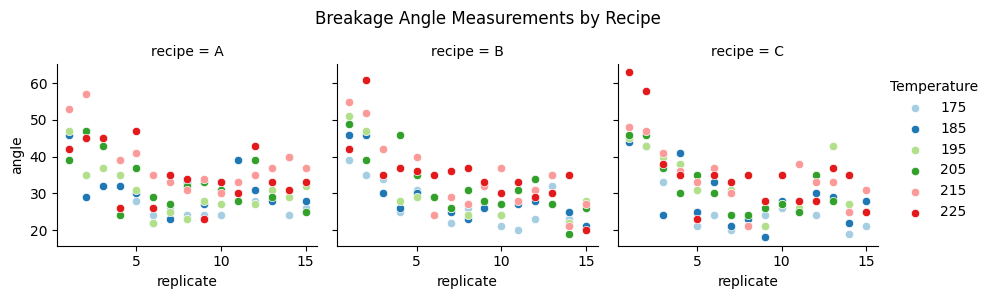

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplots of breakage angle divided by temperature, recipe shown by hue
g = sns.FacetGrid(df, col="temperature", col_wrap=3, hue='recipe', palette='Paired', legend_out=True)
g.map(sns.scatterplot, "replicate", "angle")
# Add legend and title
g.add_legend(title='Recipe')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Breakage Angle Measurements by Temperature')
plt.show()

# Scatterplots of breakage angle by recipe with hue showing baking temperature
g = sns.FacetGrid(df, col="recipe", hue='temperature', palette='Paired', legend_out=True)
g.map(sns.scatterplot, "replicate", "angle")
g.add_legend(title='Temperature')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Breakage Angle Measurements by Recipe')
plt.show()

The first few replicates are all showing much higher breakage angles with greater consistency over time.  Presumably the later trials are more consistent as a consensus was reached for what constitutes breakage of the cake.  It may be worth the time to compare results both including and excluding the first two trials.

### Conclusions

The higher temperature bakes yielded greater breakage angles, with 215&deg;C showing the highest average angle overall.  The best performing combination is recipe A at 215&deg;C with an average breakage angle of 38.67 degrees. This is about 8% greater than the next best combination of recipe C at 225&deg;C which had an average breakage angle of 35.73 degrees, and 41% greater than the worst combination of recipe B at 175&deg;C which broke at only 26.87 degrees.



### Appendix of Additional EDA

In [ ]:
# Scatterplots of all measurements for each combination of recipe and temperature
g = sns.FacetGrid(df, col="recipe",  row="temperature")
g.map(sns.scatterplot, "replicate", "angle")
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Breakage Angle Measurements by Temperature and Recipe')
plt.show()